# 第4章: 形態素解析

In [1]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line != 'EOS\n':
            fields = line.split('\t')
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attr = fields[1].split(',')
                morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
        
for morph in sentences[3]:
    print(morph)

{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


In [4]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['surface'])

print(f'動詞の表層形の種類: {len(ans)}\n')
for v in list(ans)[:10]:
    print(v)

動詞の表層形の種類: 3893

割っ
圧さ
失せる
持ち切っ
のぼる
呑み込ま
やられる
付け
振り上げ
抛り出さ


In [6]:
ans = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            ans.add(morph['base'])

for v in list(ans)[:10]:
    print(v)

ちゃう
遂げる
叩き込む
失せる
のぼる
溜める
やられる
動き出す
更ける
添う


In [13]:
ans = set()
for sentence in sentences:
    for i in range(1, len(sentence) -1):
        if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
            ans.add(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])

for n in list(ans)[:10]:
  print(n)

痛憤の音
同類のよう
玄関の障子
多量の滋味
祐筆の妹
畳の目
葉蘭の影
前のこと
縄の各部
魚の事


In [12]:
ans = set()
for sentence in sentences:
    nous = ''
    num = 0
    for morph in sentence:
        if morph['pos'] == '名詞':
            nouns = ''.join([nous, morph['surface']])
            num += 1
        elif num >= 2:
            ans.add(nous)
            nouns = ''
            num = 0
        else:
            nouns = ''
            num = 0
    if num >= 2:
        ans.add(nouns)

print(f'連接名詞の種類: {len(ans)}\n')
for n in list(ans)[:10]:
    print(n)

連接名詞の種類: 4


一
敬具
大学院


In [3]:
from collections import defaultdict 

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

for w in ans[:10]:
    print(w)

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5975)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


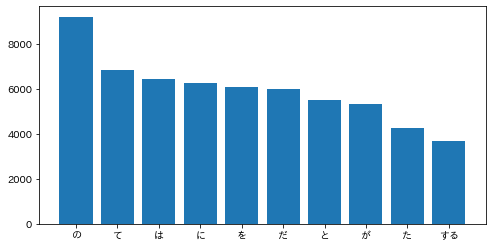

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

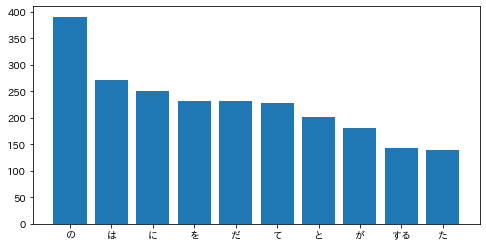

In [7]:
ans = defaultdict(int)

for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] != '記号':
                ans[morph['base']] += 1
del ans['猫']
ans = sorted(ans.items(), key=lambda x:x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

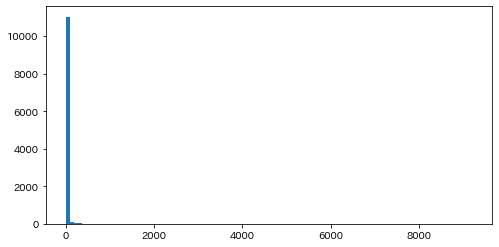

In [8]:
ans = defaultdict(int)

for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = ans.values()

plt.figure(figsize=(8,4))
plt.hist(ans, bins=100)
plt.show()

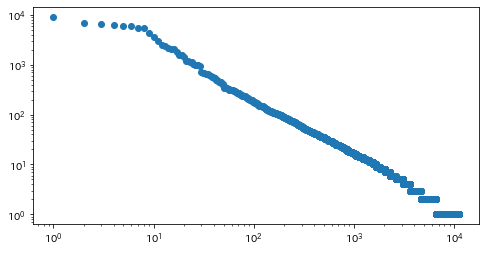

In [10]:
import math
ans = defaultdict(int)

for sentence in sentences:
    for morph in sentence:
        if morph['pos'] != '記号':
            ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x:x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8,4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.show()